In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import chart_studio
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = stopwords.words('english') + stopwords.words('spanish') 
from IPython.core.display import HTML
from IPython.display import  Markdown
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
from shapely.geometry import Point
from  sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#my colors
colors= ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#fcca46','#a1c181','#619b8a','#386641']



In [27]:
#username = 'preciousareeveso' # your plotly username
#api_key = 'IMn7kkcBFANqylYRBNY6' # your api key - go to profile > settings > regenerate key
#chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

chart_studio.tools.set_credentials_file(username='preciousareeveso', api_key='IMn7kkcBFANqylYRBNY6')


In [28]:
Adaptations2019 = pd.read_csv('2019_Cities_Adaptation_Actions.csv')
Adaptations2020 = pd.read_csv('2020_-_Cities_Adaptation_Actions.csv')
Adaptaction2021 = pd.read_csv('2021_Cities_Adaptation_Actions.csv')
hazard2021 = pd.read_csv('2021_Cities_Climate_Hazards.csv')
haza2021 = hazard2021


In [29]:
#function for bargraphs
def sort_dict_by_value(dict):
    
    # Change dict from (key,value) to (value,key) pairs
    # {'a': 20,'b': 10,'c': 30}  changes to  {20: 'a', 10: 'b', 30: 'c'}
    
    dict = {v:k    for(k,v) in dict.items()}
    
    # Sort list of tuples in Desc order
    # ([(20, 'a'), (10, 'b'), (30, 'c')])  changes to   [(30, 'c'), (20, 'a'), (10, 'b')]
    
    list_tuples = sorted(dict.items(), reverse=False)
    
    # Create dictionary from list of tuples (Dictionary Comprehension)
    # {'a':20,'b':10,'c':30} 
    
    dict = {v:k for (k,v) in list_tuples}
    
    return dict



In [30]:
def plot_chart(count_dict, title, color, ylabel, orientation='v' ):
    
    count_series = pd.Series(count_dict)
    
    fig = go.Figure()
    
    trace = go.Bar(
        x=count_series.index,
        y=count_series.values,
        text=count_series.values,
        textposition='outside',
        marker=dict(
            color=color
            ),
    )

    fig.add_trace(trace)
    
    #Set xaxis_tickangle depending on orientation
    if (orientation =='h'):
        angle = 0 
    else:
        angle=-45

    # Set layout properties for title, title_font, axis_tick_angle and background color
    fig.update_layout(
        autosize=False,
        width=500,
       height=600,
        
        title=dict(
            text=title,
            y=0.9,
            x=0.5,
            xanchor= 'center',
            yanchor= 'top'),title_font_color='black',
        
        font=dict(
            family="Arial",
            size=16,
            color="#222A2A"
        ),
        
        xaxis_tickangle=angle,
        xaxis=dict(categoryorder='total ascending'),
        yaxis=dict(categoryorder='total ascending',
        showticklabels=True,
        zeroline=False),
        plot_bgcolor = 'White',
       )

    fig.update_yaxes(
        title_text =ylabel, title_standoff = 3,  tickfont=dict(size=12),
       showline=False)
    fig.update_xaxes( tickfont=dict(size=16))
    fig.write_html('count_dict.html') #save to html
    fig.show()
    #py.iplot(fig, filename = 'count_dict', auto_open=True)

    

In [31]:
count_dict = {
    '2019' : (Adaptations2019['Country'].unique().size),
    '2020' : (Adaptations2020['Country'].unique().size),
    '2021' : (Adaptaction2021['Country'].unique().size),
    
} 
plot_chart(count_dict,'Countries reporting to CDP','#620042','Number of Countries')


In [32]:
count_dictt = {
    '2019' : (Adaptations2019['City'].unique().size),
    '2020' : (Adaptations2020['City'].unique().size),
    '2021' : (Adaptaction2021['City'].unique().size),
    
} 

plot_chart(count_dictt,'Cities reporting to CDP', 'rgb(136,34,85)','Number of Cities')

In [33]:

#Dataframe of cities that reported climate hazards in 2019, 2020 and 2021
Hazards2019 = Adaptations2019.loc[Adaptations2019['Climate hazard'].notnull()]
Hazards2020 = Adaptations2020.loc[Adaptations2020['Climate hazard'].notnull()]
Hazards2021 = Adaptaction2021.loc[Adaptaction2021['Climate hazard'].notnull()]

In [34]:

#Dataframe of cities that did not report climate hazards (NA)in 2019, 2020 and 2021
Nohaz2019 = Adaptations2019.loc[Adaptations2019['Climate hazard'].isnull()]
Nohaz2020 = Adaptations2020.loc[Adaptations2020['Climate hazard'].isnull()]
Nohaz2021 = Adaptaction2021.loc[Adaptaction2021['Climate hazard'].isnull()]


In [35]:
#How many cities reported climate hazards in 2019, 2020 and 2021
#How many cities did not report climate hazards (NA) in 2019, 2020 and 2021
haz_cit_count = {
    '2019' : [(Hazards2019['City'].unique().size),(Nohaz2019['City'].unique().size)],
    '2020' : [(Hazards2020['City'].unique().size),(Nohaz2020['City'].unique().size)],
    '2021' : [(Hazards2021['City'].unique().size),(Nohaz2021['City'].unique().size)]
    
} 
haz_cit_count=pd.DataFrame(haz_cit_count)
#save to csv
haz_cit_count.to_csv=('haz_cit_count.csv')
haz_cit_count

,2019,2020,2021
0,439,459,530
1,177,113,97


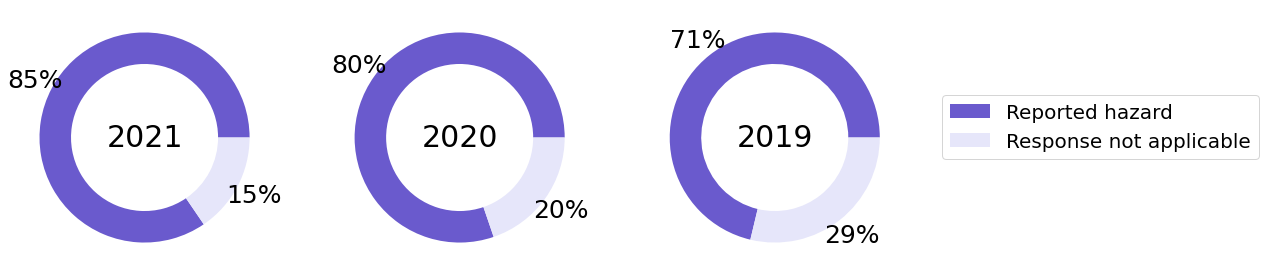

In [36]:
#Percentage of cities reporting climate hazards in 2019, 2020 and 2021

fig, axes = plt.subplots(1,3, figsize=(16,10))

for ax, col in zip(axes, haz_cit_count.columns.sort_values(ascending=False)):
    ax.pie(haz_cit_count[col],pctdistance=1.18,autopct='%.0f%%',colors= ['slateblue','lavender'], textprops={'fontsize':25}, wedgeprops=dict(width=.3))
    ax.set(ylabel='', aspect='equal')
    ax.text(0, 0, col, ha='center', va='center', fontsize=30)
#ax.set_title('Cities reporting climate hazards over time', loc='center', pad=3,fontsize=20)
    
plt.legend(labels=['Reported hazard','Response not applicable'], loc="best",fontsize=20,bbox_to_anchor=(1.1, 0.2, 0.5, 0.5))

plt.savefig('HAZCOUNTRIES.png',format="png")

In [37]:

#Adaptations2021 = Adaptations2021[Adaptations2021['Climate hazard'] == 'Question not applicable'].sum()
Adaptation2019= Adaptations2019.drop(Adaptations2019.index[Adaptations2019['Climate hazard'] == 'Question not applicable'], inplace=True) 
Adaptation2020= Adaptations2020.drop(Adaptations2020.index[Adaptations2020['Climate hazard'] == 'Question not applicable'], inplace=True) 
Adaptactions2021= Adaptaction2021.drop(Adaptaction2021.index[Adaptaction2021['Climate hazard'] == 'Question not applicable'], inplace=True) 

In [38]:
#Visualize How many countries reported hazard in 2019, 2020 and 2021


count_dicts = {
    'Hazard2019' : (Hazards2019['Country'].unique().size),
    'Hazard2020' : (Hazards2020['Country'].unique().size),
    'Hazard2021' : (Hazards2021['Country'].unique().size),
    
} 
plot_chart(count_dicts,'Countries reporting Climate Hazards','maroon','number of cities')


In [39]:
#Visualize How many cities reported hazard in 2019, 2020 and 2021
count_dicti = {
    '2019' : (Hazards2019['City'].unique().size),
    '2020' : (Hazards2020['City'].unique().size),
    '2021' : (Hazards2021['City'].unique().size),
    
} 
plot_chart(count_dicti,'Cities reporting Climate Hazards','rgb(136,34,85)', 'number of cities')


In [40]:
#Save in a table
Hazardcitiesgraph = pd.Series(count_dictt)
Hazardcitiesgraph.to_csv('Hazardcitiesgraph.csv')

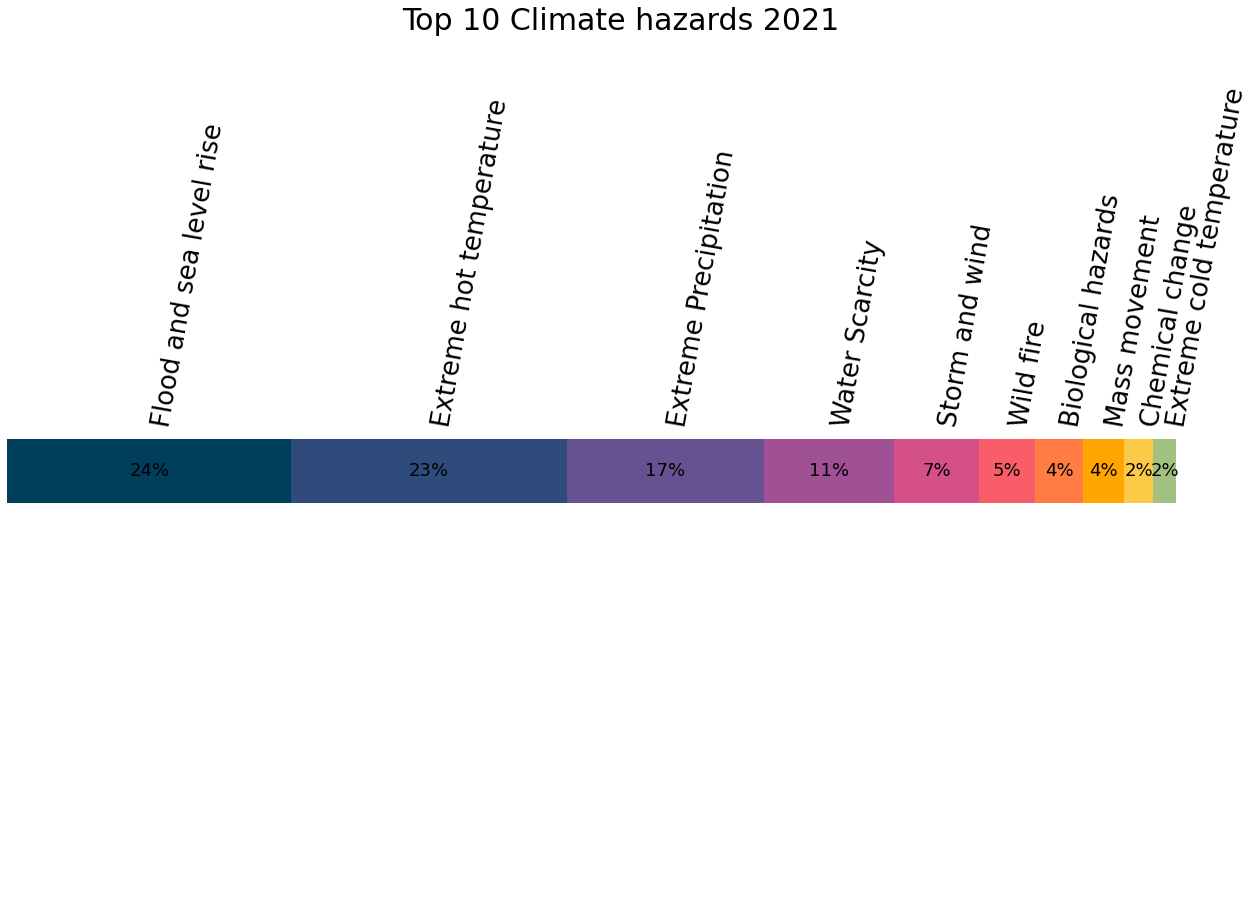

In [69]:
# Top 10 Climate Hazards faced by cities
Adaptaction2021['climate_hazard_2021_gen'] = Adaptaction2021['Climate hazard'].str.split(">").str[0]

df=Adaptaction2021['climate_hazard_2021_gen'].value_counts().head(10).to_frame().transpose()
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot()
df.plot(kind='barh',stacked=True,legend=False, color=colors, ax=ax1, grid=False, width=0.04)
ax1.set_ylabel('')
for p in range(0,len(ax1.patches)):
    b = ax1.patches[p].get_bbox()
    ax1.annotate(df.columns[p] , ((b.x0 + b.x1)/2 - 0.2 , b.y1 + 0.01),rotation=-280,fontsize=26)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)
ax1.tick_params(tick1On=False)
#dfa['Hazard %'] = Adaptations2021['climate_hazard_2021_gen'].value_counts()/Adaptations2019['climate_hazard_2019_gen'].count()

#Adaptations2021['climate_hazard_2021_gen'].count() #get sum of climate hazard(=4394) to find % of hazards 
for rec in ax1.patches:
    height = rec.get_height()
    ax1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format((rec.get_width()/4394)*100),fontsize=18,
              ha='center', 
              va='center')

plt.title("Top 10 Climate hazards 2021",fontsize=30)
plt.savefig('TOP HAZARDS.png',format="png")
plt.show()



In [43]:
hazard2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 23 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Questionnaire Name                                                                                       4163 non-null   object 
 1   Account Number                                                                                           4163 non-null   int64  
 2   Account Name                                                                                             4163 non-null   object 
 3   Country                                                                                                  4163 non-null   object 
 4   CDP Region                                                                          

In [44]:
climate_haz2021=haza2021.filter(['Current probability of hazard','Current magnitude of hazard',
                            'Future expected magnitude of hazard'])
climate_haz2021.columns


Index(['Current probability of hazard', 'Current magnitude of hazard',
       'Future expected magnitude of hazard'],
      dtype='object')

In [45]:

print(climate_haz2021['Current probability of hazard'].count(),
climate_haz2021['Current magnitude of hazard'].count(),
climate_haz2021['Future expected magnitude of hazard'].count())


3868 3861 3627


In [46]:
print(climate_haz2021['Current probability of hazard'].value_counts(),
climate_haz2021['Current magnitude of hazard'].value_counts(),
climate_haz2021['Future expected magnitude of hazard'].value_counts())


High                                  1211
Medium High                            967
Medium                                 891
Medium Low                             340
Low                                    296
Do not know                            135
Does not currently impact the city      28
Name: Current probability of hazard, dtype: int64 Medium                                1069
Medium High                           1016
High                                   881
Medium Low                             418
Low                                    318
Do not know                            117
Does not currently impact the city      42
Name: Current magnitude of hazard, dtype: int64 High           1139
Medium         1116
Medium High     636
Do not know     317
Low             270
Medium Low      149
Name: Future expected magnitude of hazard, dtype: int64


In [70]:
#Current probability of hazard','Current magnitude of hazard',and'Future expected magnitude of hazard faced by cities
k=[climate_haz2021['Current probability of hazard'].value_counts(),
  climate_haz2021['Current magnitude of hazard'].value_counts(),
  climate_haz2021['Future expected magnitude of hazard'].value_counts()]
s=pd.DataFrame(k)

#fill na values
s['Does not currently impact the city']=s['Does not currently impact the city'].fillna(0)
s

#Get % of magnitudes of hazards
x=s.div(s.sum(axis=1), axis=0).mul(100).round(1) 

#To aid visualization sum the columns'Do not know' and 'Does not currently impact the city' for easy interpretation 

x['Dont know / no impact' ] =x['Do not know'] + x['Does not currently impact the city']
x.drop(['Do not know', 'Does not currently impact the city'], axis=1, inplace=True)

x

# visualize Current probability of hazard','Current magnitude of hazard',and'Future expected magnitude of hazard faced by cities
top_labels = ['High', 'Medium<br>High', 'Medium', 'Medium<br>Low', '  Low ', ' Dont know/<br>no impact']

#colors = ['rgba(38, 24, 74, 0.7)','rgba(38, 26, 74, 0.75)','rgba(71, 58, 131, 0.8)','rgba(71, 58, 135, 0.8)'
          #'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)','rgba(190, 192, 213, 1)']
#colors = ['rgb(0,100,0)', 'rgb(0,128,0)', 'rgb(34,139,34)','rgb(46,139,87)',
           #'rgb(60,179,113)', 'rgb(127,255,122)','rgb(144,238,144)', 
            #'rgb(152,251,152)', 'rgb(240,255,240)']
colors = [ 'rgba(38, 24, 74, 0.8)','rgba(71, 58, 131, 0.8)','rgba(122, 120, 168, 1)',
          'rgba(122, 120, 168, 0.75)','rgba(190, 192, 213, 1)','rgba(190, 192, 213, 0.6)']
x_data = x.values

y_data = x.index

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd], 
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd, 
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[0]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=12,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]



fig.update_layout(annotations=annotations)
fig.write_html('climatehazmagnitude.html') 
fig.show()

In [48]:
#Dataframe of cities reporting Adaptation action in 2019, 2020 and 2021
Action2019 = Adaptations2019.loc[Adaptations2019['Adaptation action'].notnull()]
Action2020 = Adaptations2020.loc[Adaptations2020['Adaptation action'].notnull()]
Actionn2021 = Adaptaction2021.loc[Adaptaction2021['Adaptation action'].notnull()]

#Dataframe of cities that did not report Adaptation action (NA)in 2019, 2020 and 2021
Noact2019 = Adaptations2019.loc[Adaptations2019['Adaptation action'].isnull()]
Noact2020 = Adaptations2020.loc[Adaptations2020['Adaptation action'].isnull()]
Noact2021 = Adaptaction2021.loc[Adaptaction2021['Adaptation action'].isnull()]

In [49]:
Adaptaction2021['Adaptation action'].value_counts().head(10)

Tree planting and/or creation of green space                      355
Flood mapping                                                     352
Community engagement/education                                    287
Crisis management including warning and evacuation systems        229
Incorporating climate change into long-term planning documents    216
Projects and policies targeted at those most vulnerable           208
Hazard resistant infrastructure design and construction           197
Flood defences – development and operation & storage              166
Real time risk monitoring                                         140
No action currently taken                                         128
Name: Adaptation action, dtype: int64

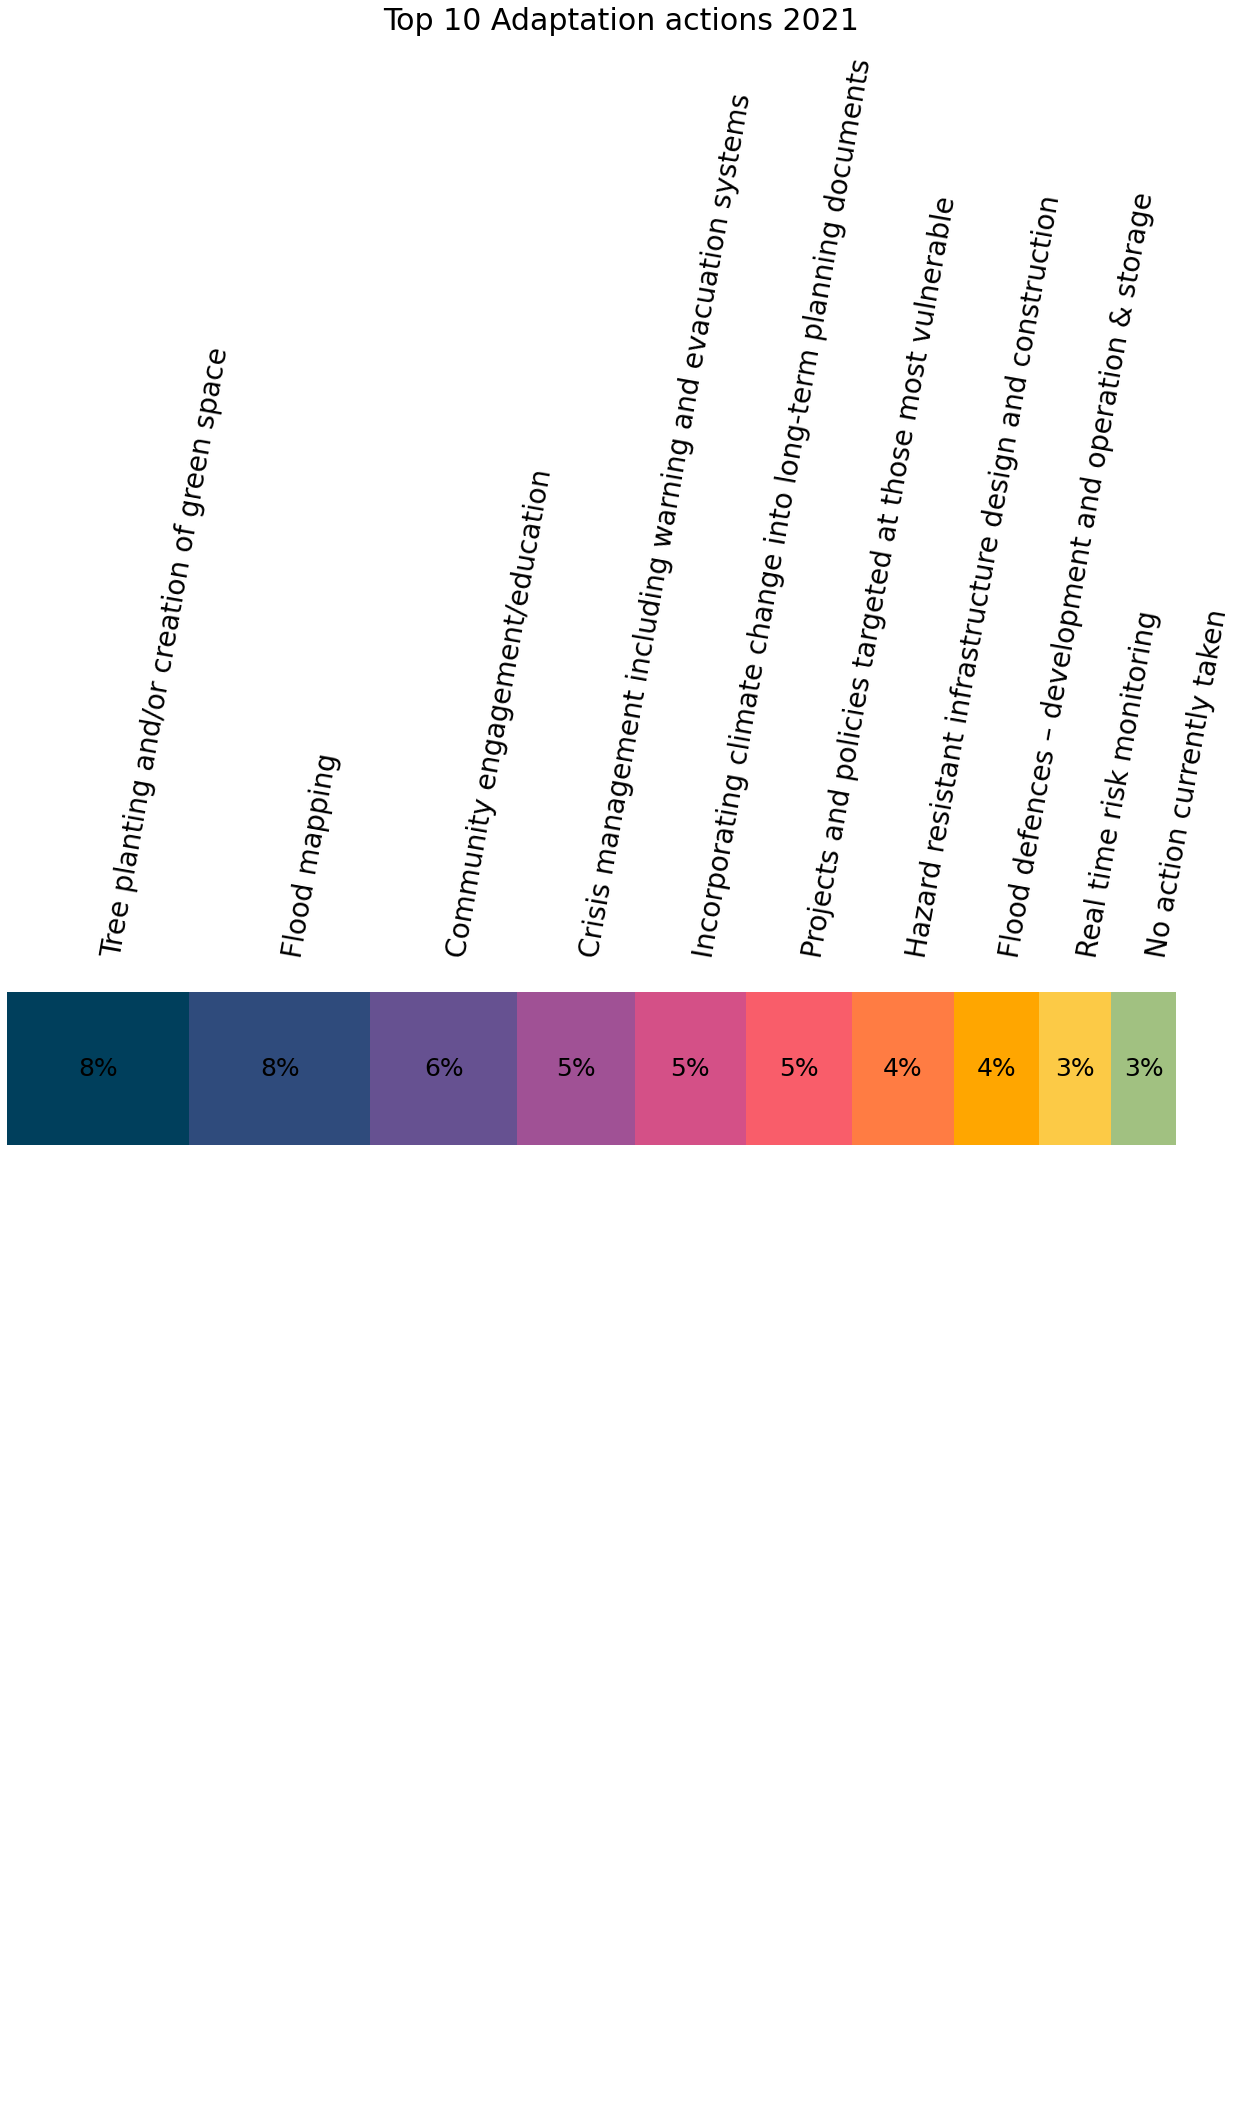

In [52]:
# Top adaptation actions taken by cities
#my colors
colors= ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#fcca46','#a1c181','#619b8a','#386641']

df=Adaptaction2021['Adaptation action'].value_counts().head(10).to_frame().transpose()
fig = plt.figure(figsize=(22,38))
ax1 = fig.add_subplot()
df.plot(kind='barh',stacked=True,legend=False, color=colors, ax=ax1, grid=False, width=0.04)
ax1.set_ylabel('')
for p in range(0,len(ax1.patches)):
    b = ax1.patches[p].get_bbox()
    ax1.annotate(df.columns[p] , ((b.x0 + b.x1)/2 - 0.2 , b.y1 + 0.01),rotation=-280,fontsize=28)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_frame_on(False)
ax1.tick_params(tick1On=False)
#dfa['Action %'] = Adaptaction2021['Adaptation action'].value_counts()/Adaptaction2021['Adaptation action'].count()

#Adaptaction2021['Adaptation actions'].count() #get sum of climate hazard(=4519) to find % of hazards 
for rec in ax1.patches:
    height = rec.get_height()
    ax1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format((rec.get_width()/4519)*100),fontsize=25,
              ha='center', 
              va='center')

plt.title("Top 10 Adaptation actions 2021",fontsize=30)
plt.savefig('TOP ACTION.png',format="png")
plt.show()



In [65]:
Action=Adaptaction2021[Adaptaction2021['Status of action'].notnull()]
Action.to_csv('Action2021.csv')

Action['Status of action'].value_counts()
Adaptaction2021['Status of actions'] = Adaptaction2021['Status of action'].str.split("and/|/|,|;").str[0]
Adaptaction2021['Status of actions_count']=Adaptaction2021['Status of actions'].value_counts()
data=Adaptaction2021['Status of actions'].value_counts()
total=Adaptaction2021['Status of actions'].count()
#Get percentage of status of action
data=data.div(total).mul(100).round(0)
data


Implementation                                  34.0
Operation                                       29.0
Pre-implementation                              11.0
Scoping                                          8.0
Pre-feasibility study                            7.0
Monitoring and reporting                         6.0
Implementation complete but not in operation     3.0
Other                                            2.0
Name: Status of actions, dtype: float64

In [66]:
#Visualize status of adaptation action taken by cities

ydata=data.index
'''['Implementation', 'Operation', 'Pre-implementation', 'Scoping',
       'Pre-feasibility study', 'Monitoring and reporting',
       'Implementation complete but not in operation', 'Other']''' #this is data.index
fig = go.Figure()
fig.add_trace(go.Bar(x = data, 
    y = ydata,
    orientation='h',
    marker=dict(
        color='rgba(0,100,0, 1)',
        line=dict(color='rgba(240,255,240)', width=1)))
                    )

fig.update_layout( title="Status of Adaptation actions",title_x=0.5,title_y=0.95,
                  font=dict(color='rgb(67, 67, 67)',size=14))
fig.update_layout(
     xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=False,
        showgrid=False,
        domain=[0, 1],
    ),

    yaxis=dict(
        showgrid=False,
        showline=False,
        categoryorder='total ascending',
        showticklabels=False,
        zeroline=False
        
    ),
    barmode='stack',
    legend=None,
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []



# Adding labels
for yd, xd in zip(ydata, data):
    # labeling the y-axis
        annotations.append(dict(xref='x', yref='y',
                            x=0.04, y=yd, 
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
        #labeling %%
for yd, xd in zip(data, ydata):       
        annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 3,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False))
        
        


fig.update_layout(annotations=annotations)
fig.write_html('actioncount.html') 

fig.show()

